In [1]:
import os
import torch
import torchvision
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
torch.manual_seed(42)

In [2]:
batch_size = 128

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5], std=[0.5])])
train_data = MNIST("./", train=True, transform=transform, download=True)
train_dataset = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [4]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=0),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.fc = nn.Linear(5 * 5 * 1, 1)

    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0), -1)
        return torch.sigmoid(self.fc(x))

In [5]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    self.lin1 = nn.Linear(100, 7*7*64)
    self.ct1 = nn.ConvTranspose2d(64, 32, 4, stride=2)
    self.ct2 = nn.ConvTranspose2d(32, 16, 4, stride=2)
    self.conv1 = nn.Conv2d(16, 1, kernel_size=7)
    self.tanh = nn.Tanh()

  def forward(self, x):
    x = F.leaky_relu(self.lin1(x))
    x = x.view(-1, 64, 7, 7)

    x = F.leaky_relu(self.ct1(x))
    x = F.leaky_relu(self.ct2(x))
    x = self.conv1(x)
    x = self.tanh(x)
    return x

In [6]:
device="cuda"
latent_dim=100
numEpochs = 300

g = Generator().to(device)
d = Discriminator().to(device)

criterion = nn.BCELoss()
generator_optim = optim.Adam(g.parameters(), lr=0.0002, betas=(0.8, 0.999))
descriminator_optim = optim.Adam(d.parameters(), lr=0.0002, betas=(0.8, 0.999))

In [7]:
# from torch.utils.tensorboard import SummaryWriter

# writerFake = SummaryWriter(f"logs/fake")
# writerReal = SummaryWriter(f"logs/real")

In [8]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt
def show_images(images, title="Generated Images"):
    img_grid = vutils.make_grid(images, normalize=True, nrow=8)
    npimg = img_grid.cpu().numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()


Epoch [1/200]Discriminator Loss: 1.3383, Generator Loss: 0.7048


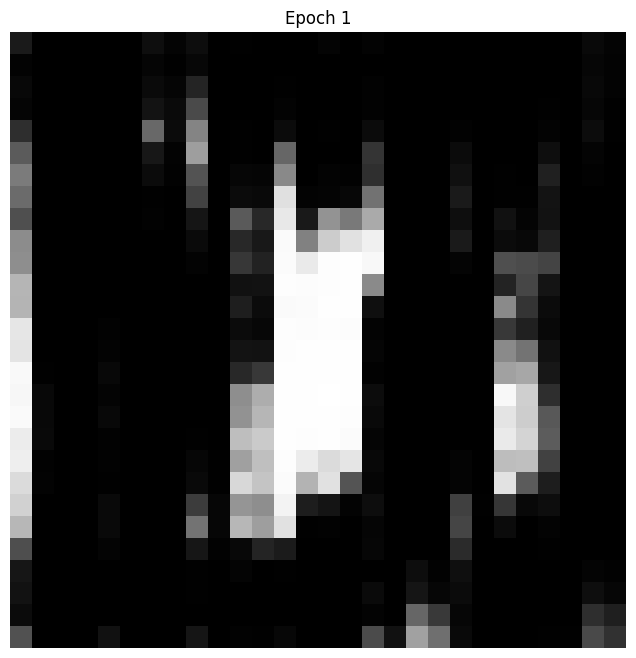

Epoch [6/200]Discriminator Loss: 1.3852, Generator Loss: 0.6996


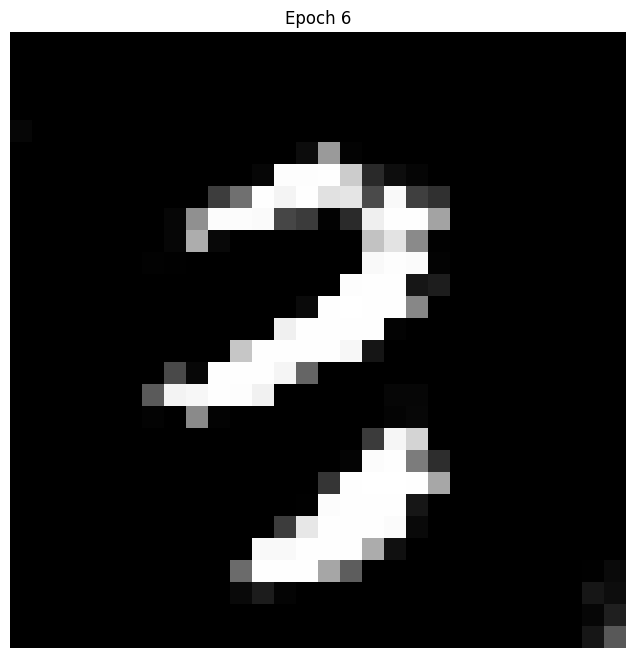

Epoch [11/200]Discriminator Loss: 1.3795, Generator Loss: 0.7018


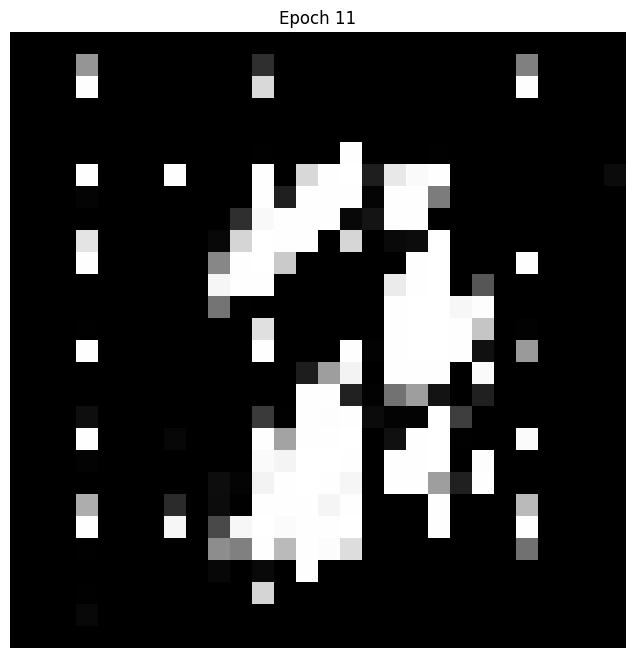

Epoch [16/200]Discriminator Loss: 1.3519, Generator Loss: 0.7283


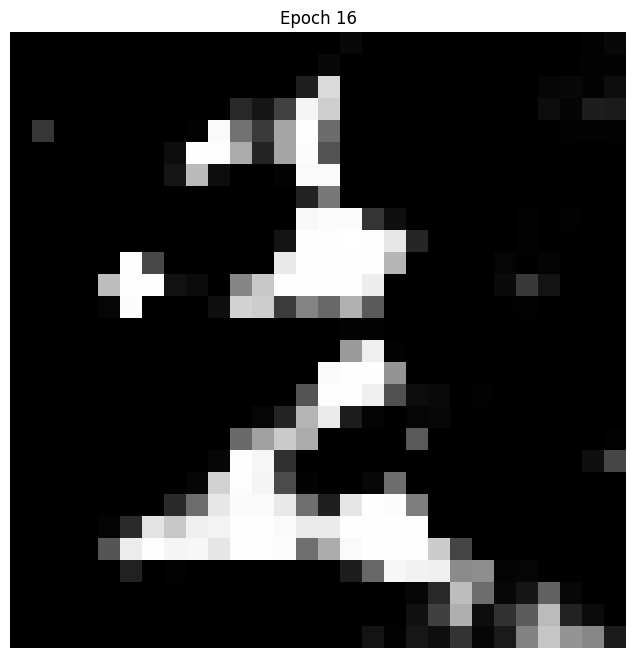

Epoch [21/200]Discriminator Loss: 1.3719, Generator Loss: 0.7216


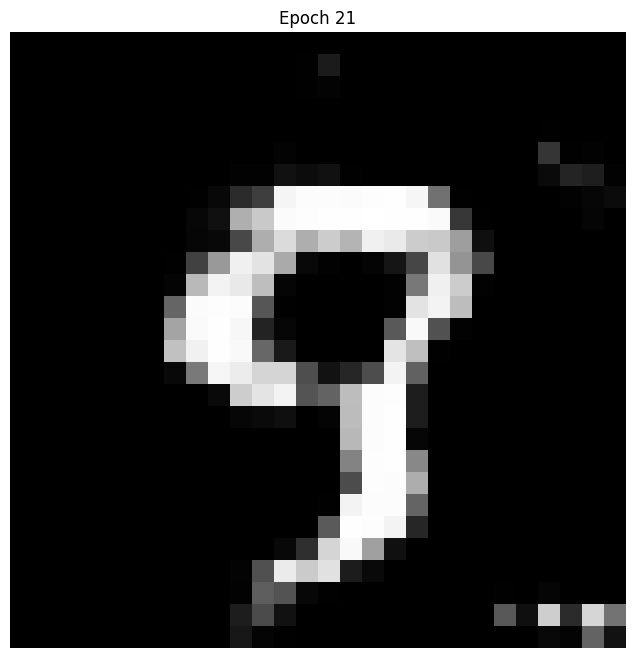

Epoch [26/200]Discriminator Loss: 1.3664, Generator Loss: 0.7077


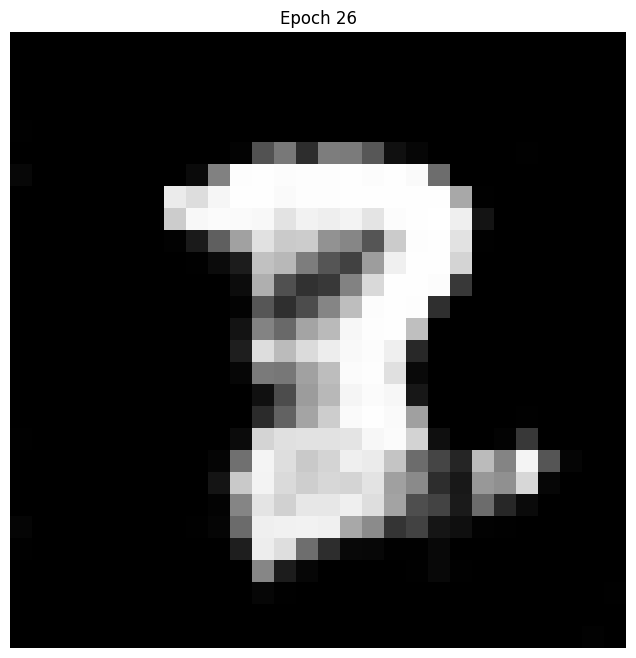

Epoch [31/200]Discriminator Loss: 1.3694, Generator Loss: 0.7162


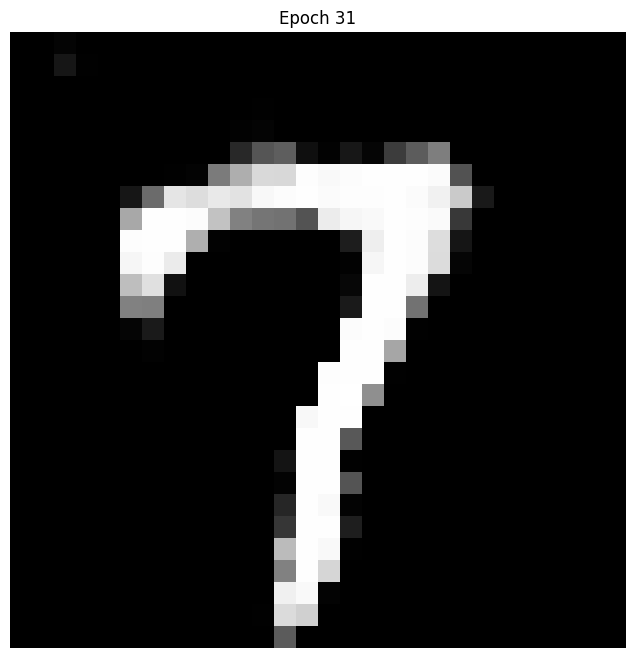

Epoch [36/200]Discriminator Loss: 1.3756, Generator Loss: 0.7085


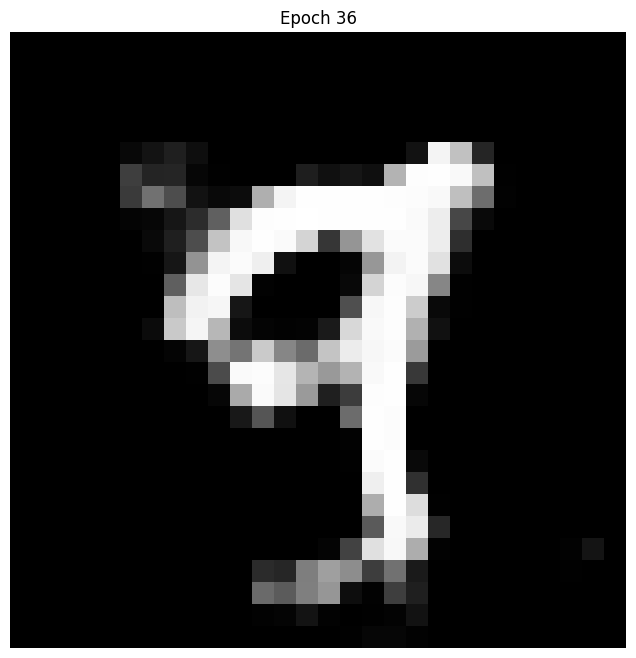

Epoch [41/200]Discriminator Loss: 1.3831, Generator Loss: 0.7074


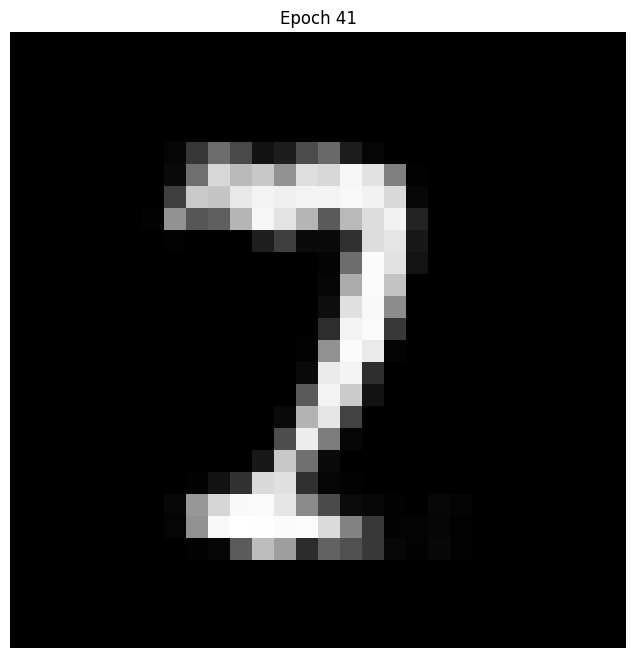

Epoch [46/200]Discriminator Loss: 1.3830, Generator Loss: 0.7022


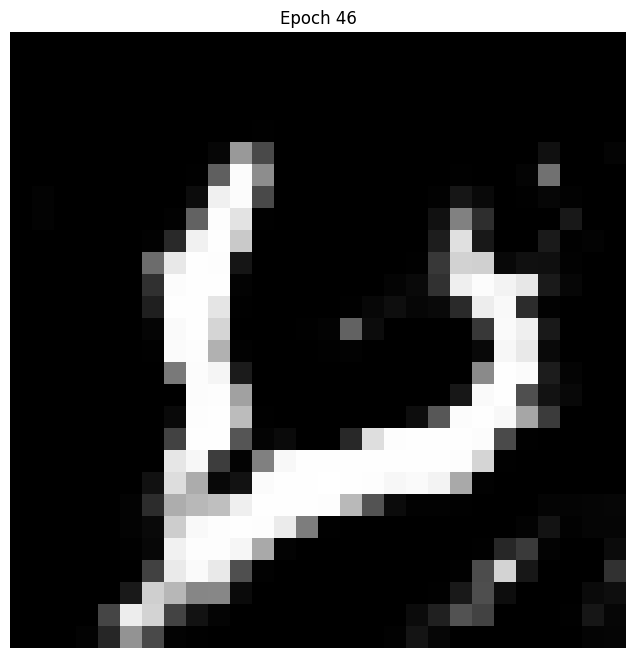

Epoch [51/200]Discriminator Loss: 1.3833, Generator Loss: 0.7009


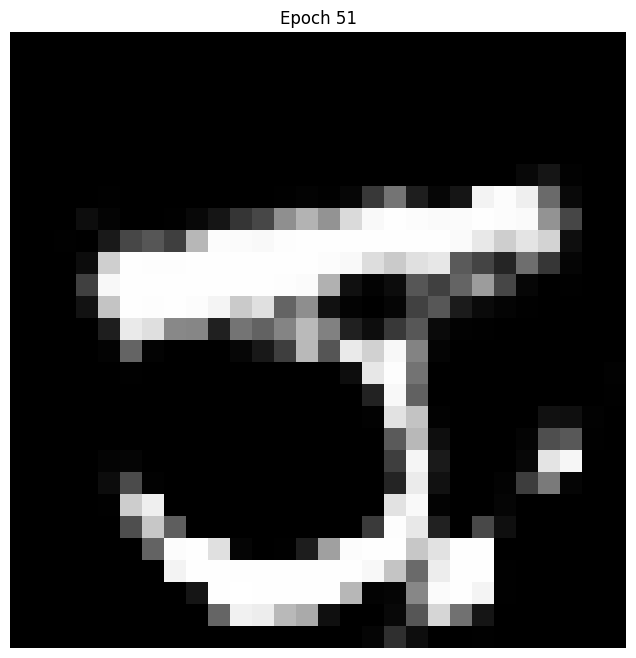

Epoch [56/200]Discriminator Loss: 1.3825, Generator Loss: 0.7022


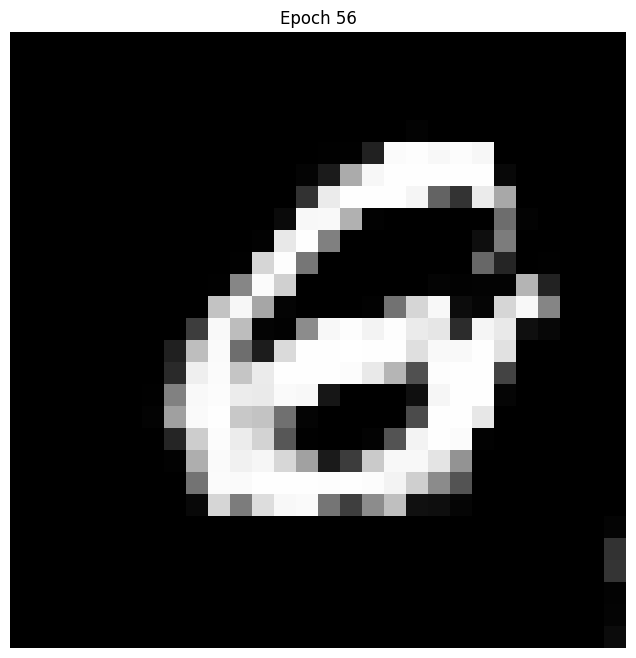

Epoch [61/200]Discriminator Loss: 1.3850, Generator Loss: 0.6982


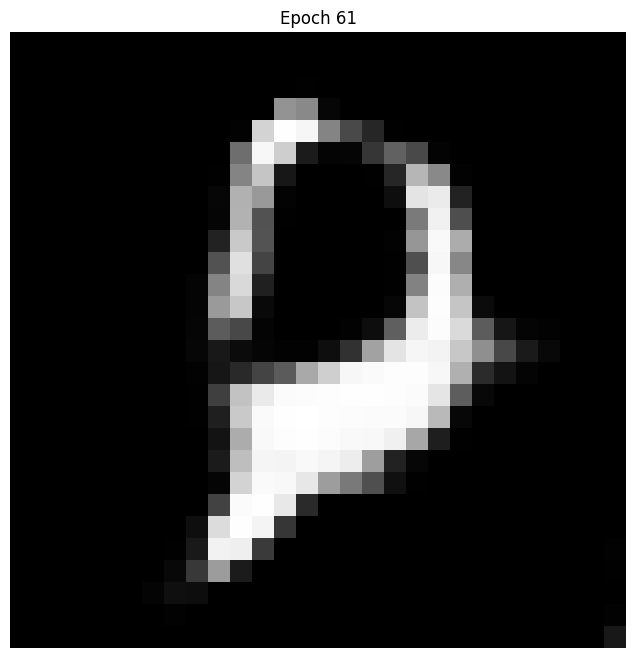

Epoch [66/200]Discriminator Loss: 1.3847, Generator Loss: 0.7038


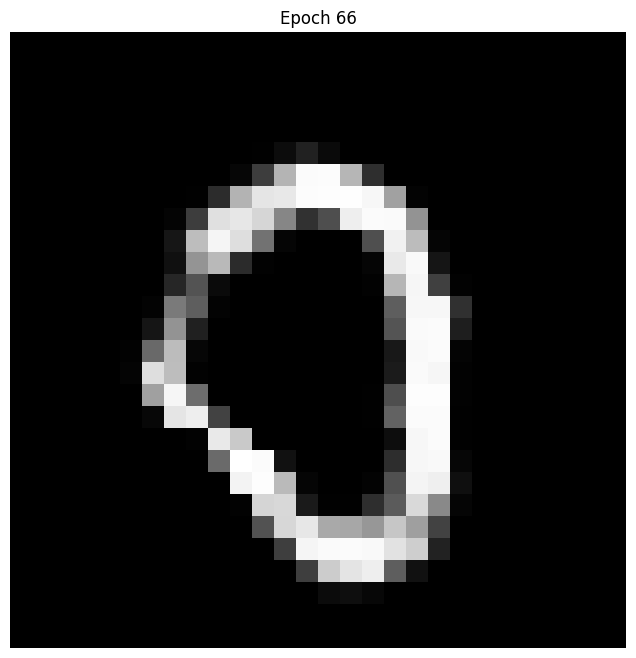

Epoch [71/200]Discriminator Loss: 1.3837, Generator Loss: 0.6988


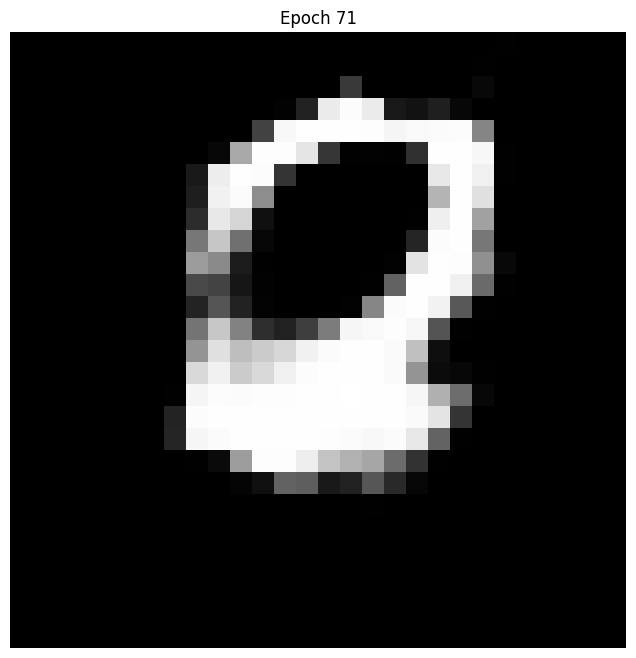

Epoch [76/200]Discriminator Loss: 1.3840, Generator Loss: 0.7028


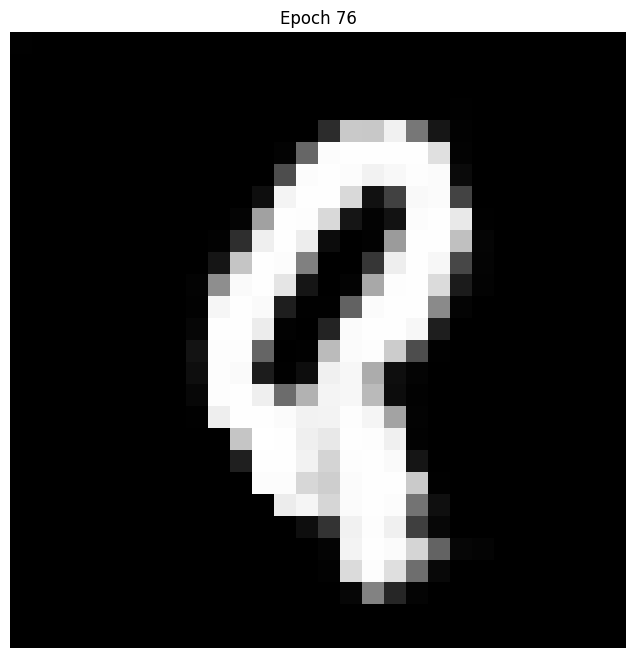

Epoch [81/200]Discriminator Loss: 1.3840, Generator Loss: 0.7004


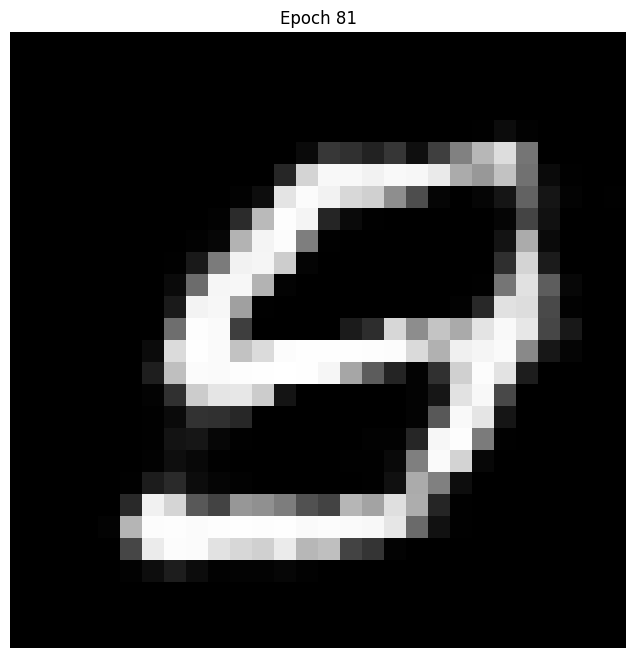

Epoch [86/200]Discriminator Loss: 1.3838, Generator Loss: 0.7000


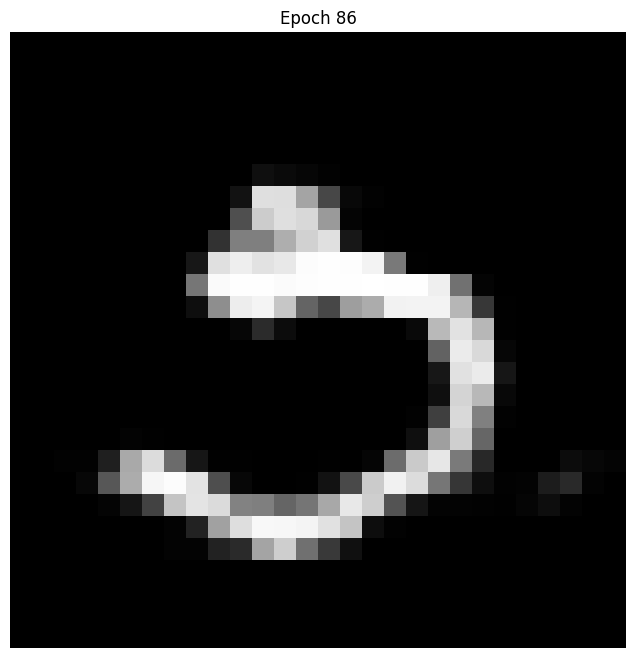

Epoch [91/200]Discriminator Loss: 1.3847, Generator Loss: 0.6956


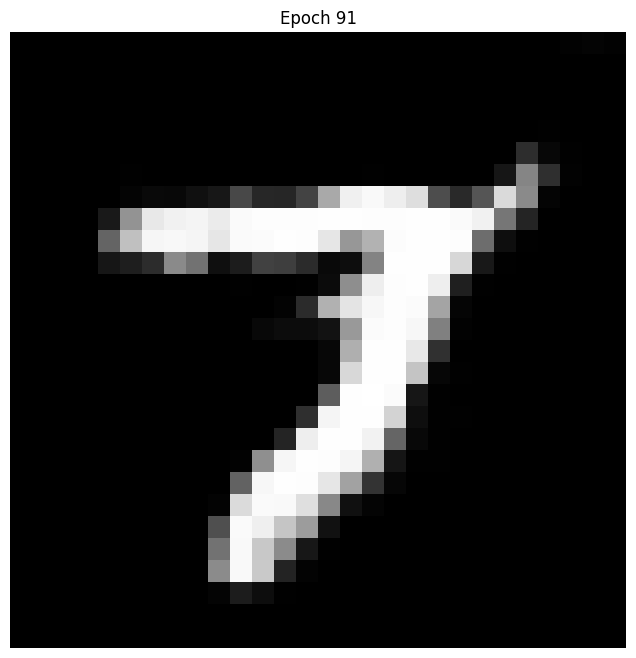

Epoch [96/200]Discriminator Loss: 1.3845, Generator Loss: 0.6986


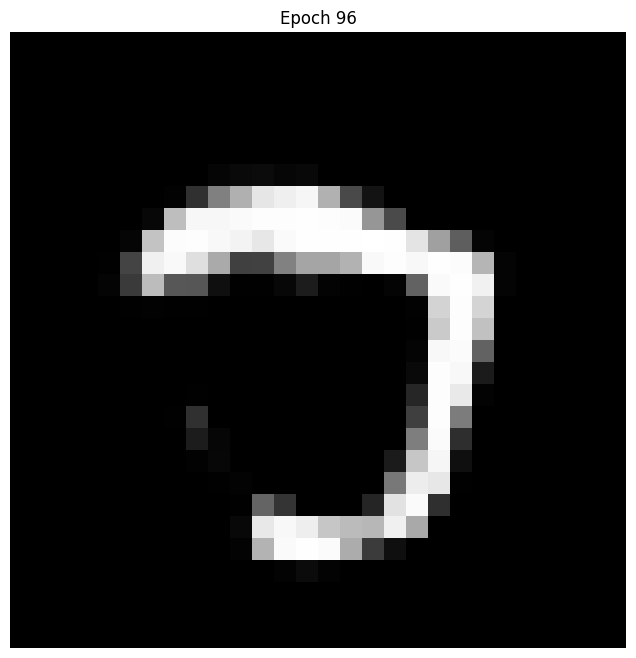

Epoch [101/200]Discriminator Loss: 1.3839, Generator Loss: 0.6979


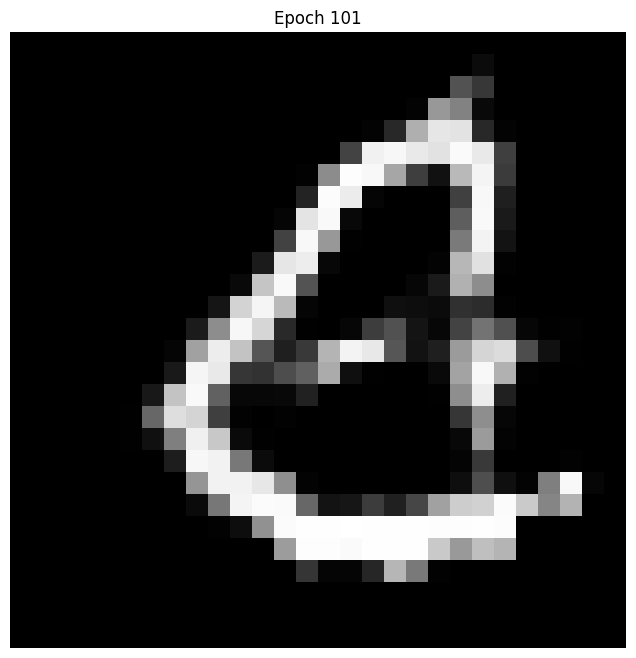

Epoch [106/200]Discriminator Loss: 1.3840, Generator Loss: 0.6983


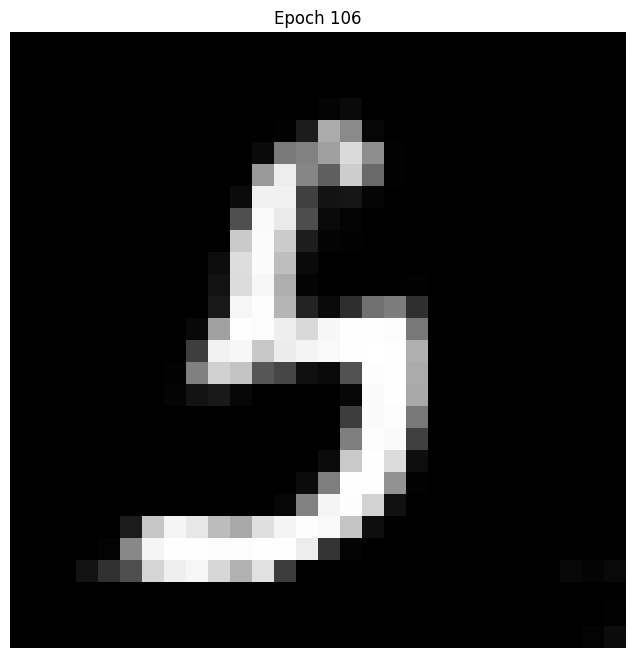

Epoch [111/200]Discriminator Loss: 1.3839, Generator Loss: 0.6980


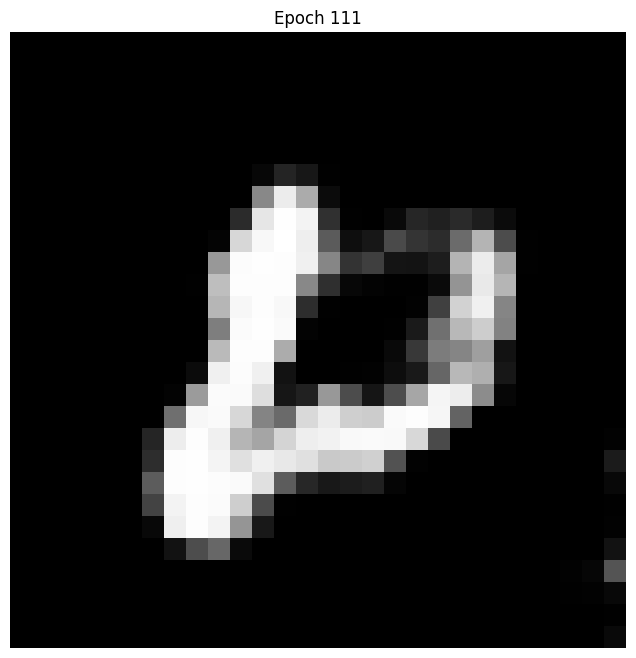

Epoch [116/200]Discriminator Loss: 1.3837, Generator Loss: 0.6966


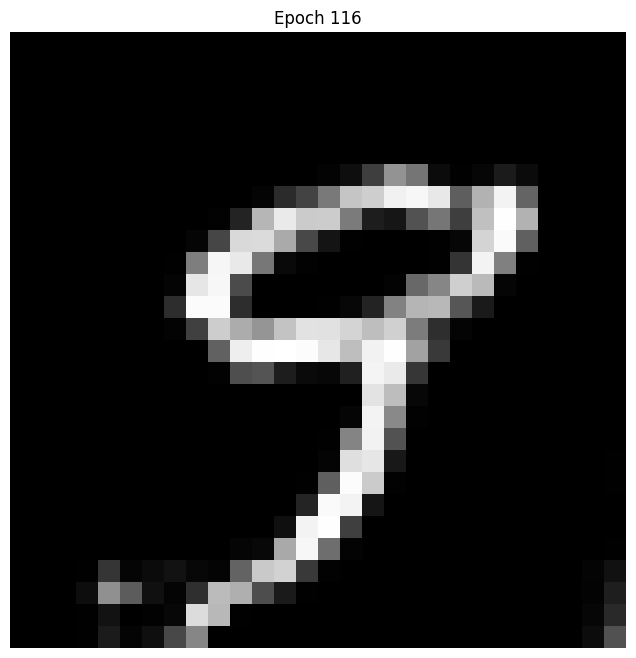

Epoch [121/200]Discriminator Loss: 1.3839, Generator Loss: 0.6957


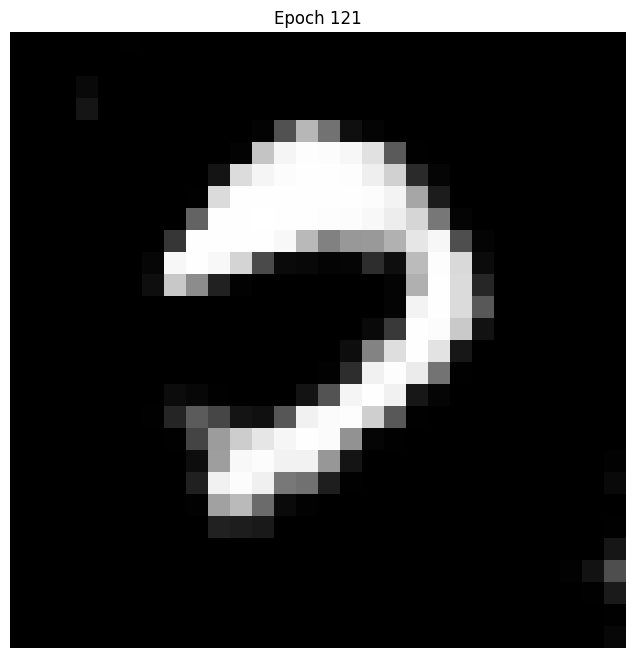

Epoch [126/200]Discriminator Loss: 1.3839, Generator Loss: 0.6987


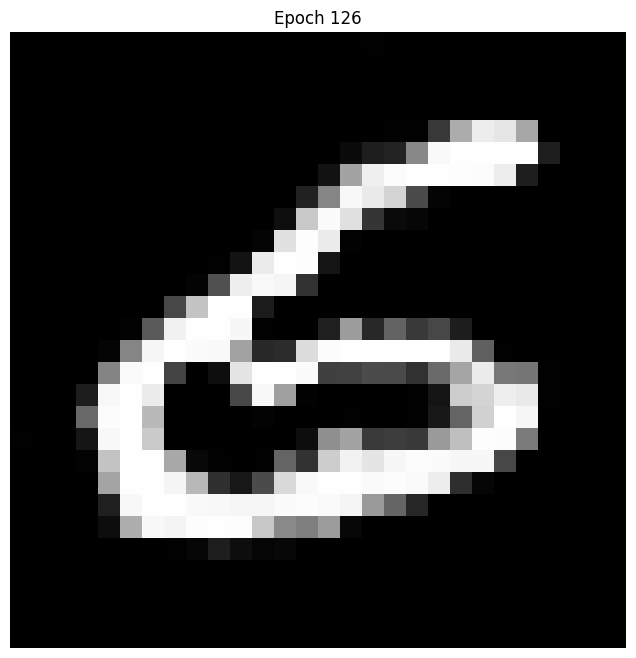

Epoch [131/200]Discriminator Loss: 1.3840, Generator Loss: 0.6981


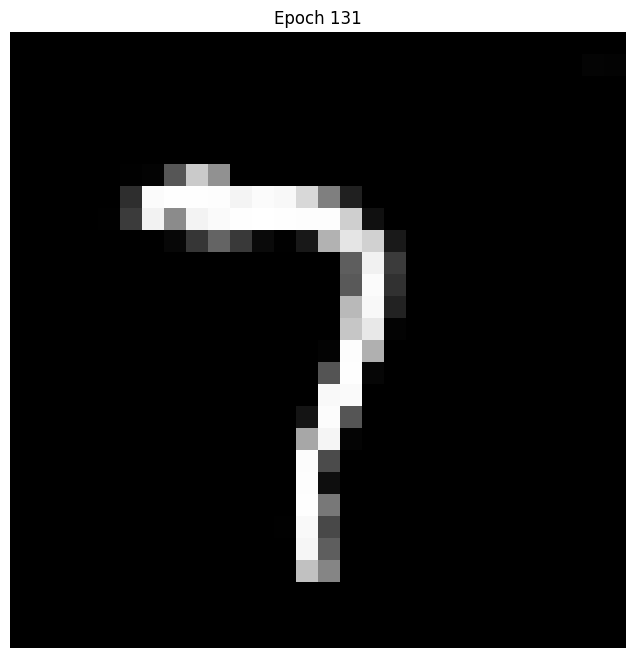

Epoch [136/200]Discriminator Loss: 1.3843, Generator Loss: 0.6991


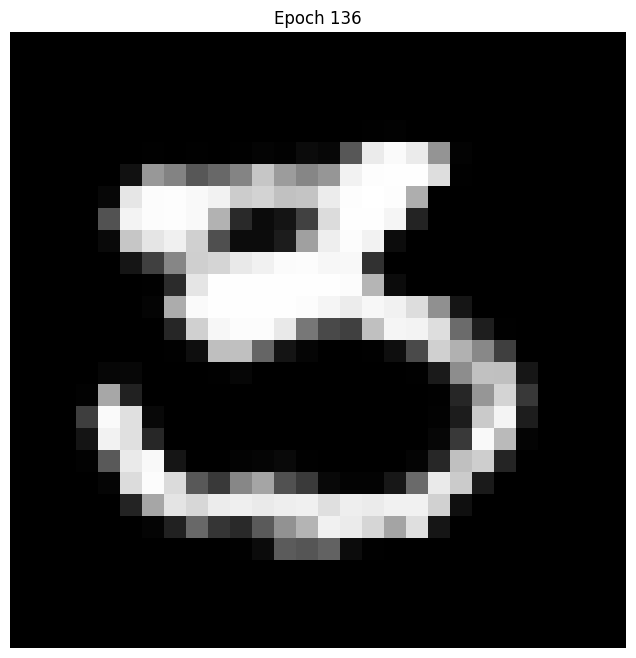

Epoch [141/200]Discriminator Loss: 1.3850, Generator Loss: 0.6978


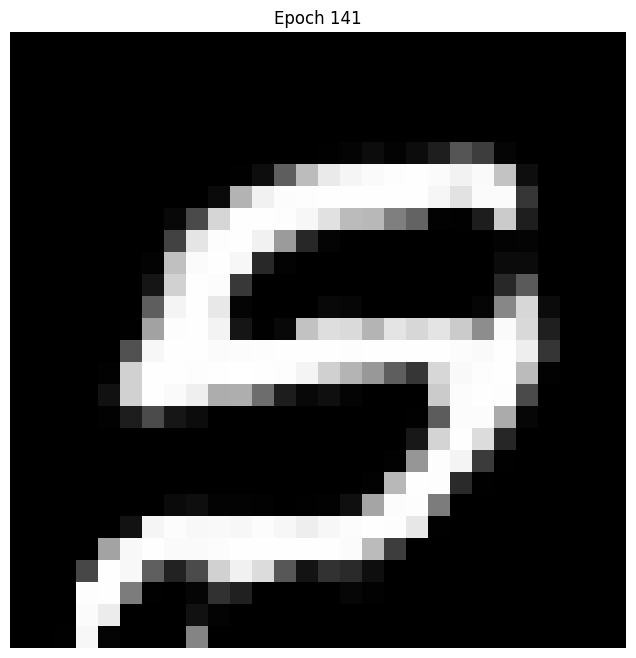

Epoch [146/200]Discriminator Loss: 1.3845, Generator Loss: 0.6965


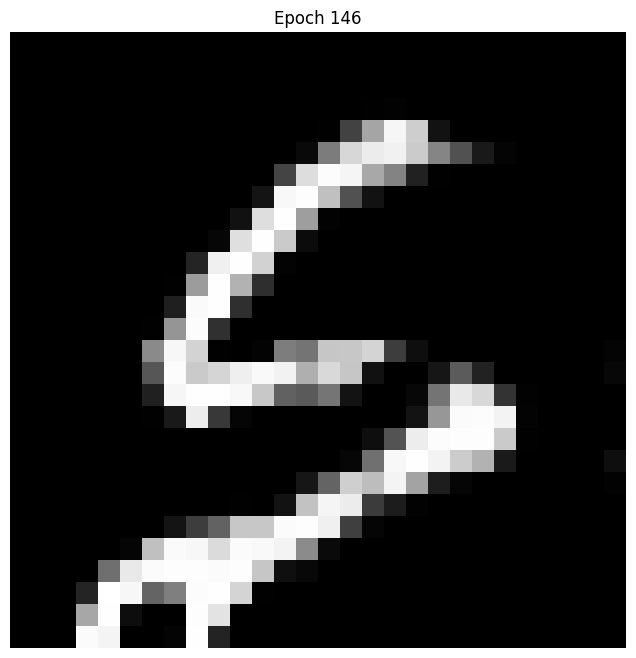

Epoch [151/200]Discriminator Loss: 1.3843, Generator Loss: 0.6964


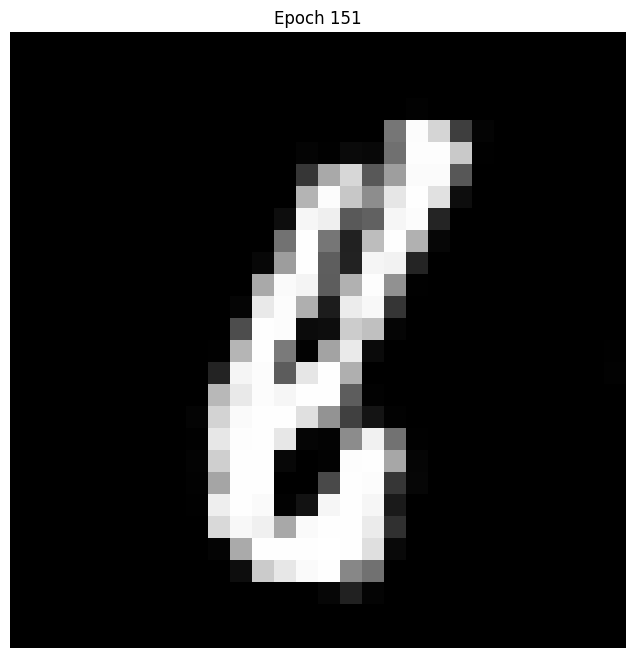

Epoch [156/200]Discriminator Loss: 1.3844, Generator Loss: 0.6952


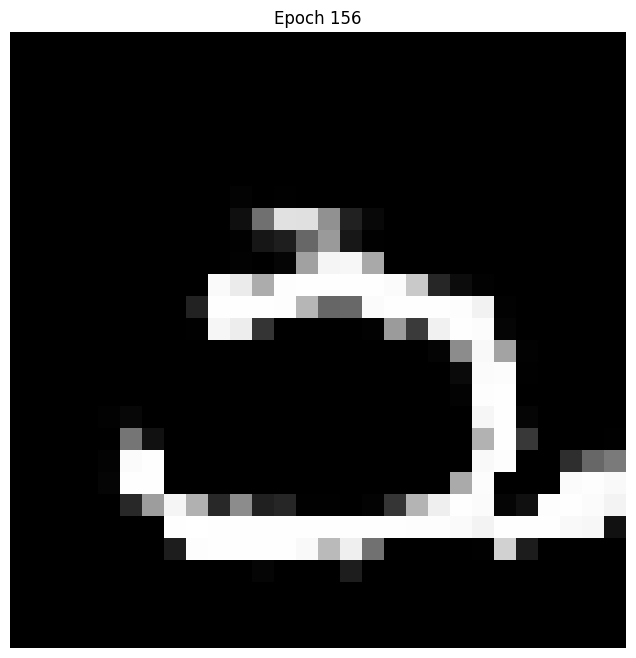

Epoch [161/200]Discriminator Loss: 1.3848, Generator Loss: 0.6976


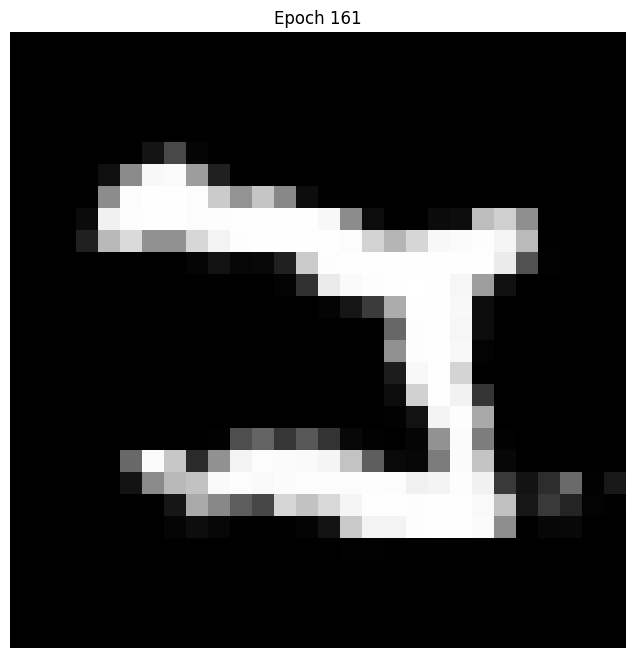

Epoch [166/200]Discriminator Loss: 1.3851, Generator Loss: 0.6951


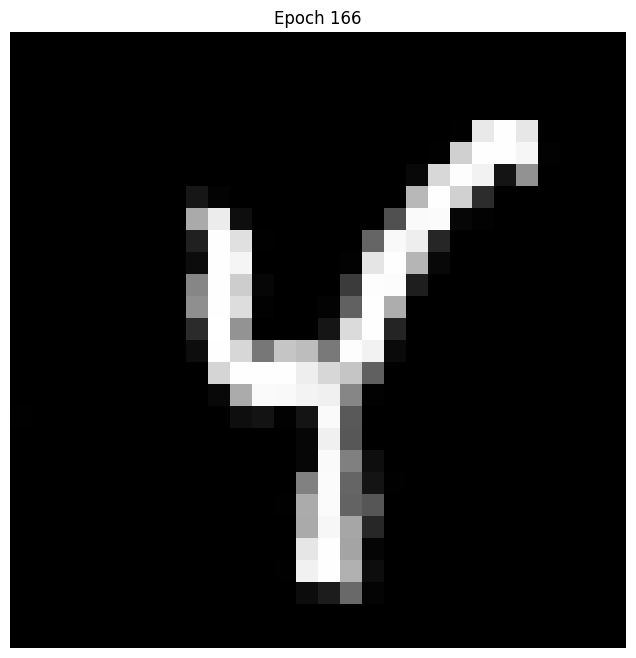

Epoch [171/200]Discriminator Loss: 1.3853, Generator Loss: 0.6958


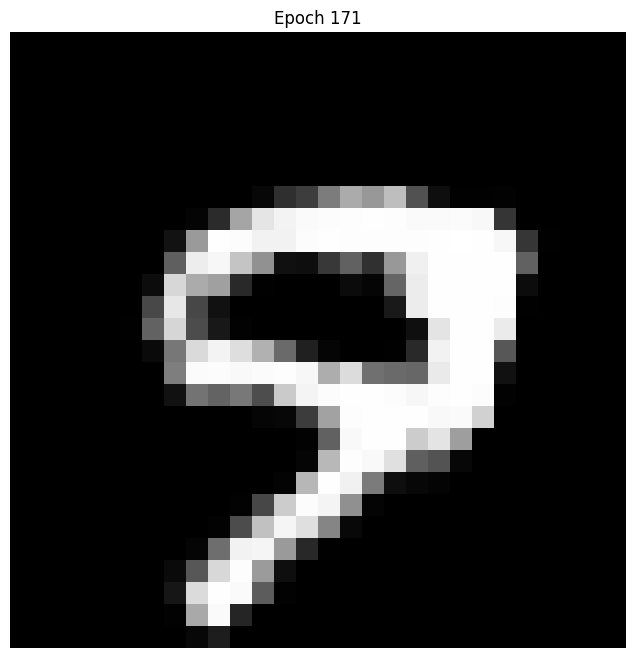

Epoch [176/200]Discriminator Loss: 1.3857, Generator Loss: 0.6963


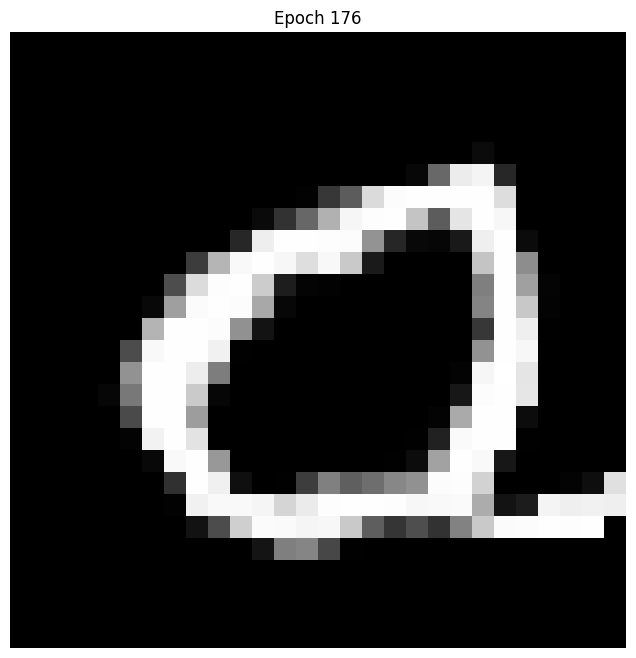

In [ ]:
import numpy as np

num_epoch = 200
for epoch in range(num_epoch):
  loss_d=[]
  loss_g=[]
  for i, data in enumerate(train_dataset):
    real_images, _ = data
    real_images = real_images.to(device)

    # train d with real images
    descriminator_optim.zero_grad()
    real_labels = torch.ones(real_images.size(0), 1, device=device)
    real_outputs = d(real_images)
    real_loss = criterion(real_outputs, real_labels)

    # train d with fake images
    noise = torch.randn(real_images.size(0), latent_dim, device=device)
    fake_labels = torch.zeros(real_images.size(0), 1, device=device)
    fake_images = g(noise)
    fake_outputs = d(fake_images.detach())
    fake_loss = criterion(fake_outputs, fake_labels)

    desc_loss = fake_loss + real_loss
    desc_loss.backward()
    descriminator_optim.step()


    # train g with
    generator_optim.zero_grad()
    fake_labels = torch.ones(real_images.size(0), 1, device=device)
    fake_outputs = d(fake_images)
    gen_loss = criterion(fake_outputs, fake_labels)
    gen_loss.backward()
    generator_optim.step()
    loss_d.append(desc_loss.item())
    loss_g.append(gen_loss.item())

  if epoch % 5 == 0:
          print(f'Epoch [{epoch+1}/{num_epoch}]'
                f'Discriminator Loss: {np.mean(loss_d):.4f}, '
                f'Generator Loss: {np.mean(loss_g):.4f}')
  if epoch % 5 == 0:
      with torch.no_grad():
          test_noise = torch.randn(1, 100, device=device)
          fake_images = g(test_noise).cpu()
          show_images(fake_images, title=f"Epoch {epoch+1}")

Висновок: можна помітити що чим більше епох для навчання моделі - тим кращі результати. Деякі цирфри, які мають чіткішу форму зазвичай генеруються краще, ті що, мають більш складні контури мають гірші результати.
Для задачі такогго типу потрібно тренувати модель не менше 100-200 епох, для того щоб отримати зрозумілий результат, а також варто використовувати моделі дискримінатора та генератора скаднішої архітектури. Незважвючи на те, що я використовувати не FNN а CNN, і такий підід мав дати кращу точність, схоже на те, що архітектуру потрібно допрацювати, для того щоб складніші цифри генерувались також якісно.

Але з огляду на поточні результати найпріорітетніші зміни: скадніша архітектура та більше епох, також метои регуляризації.